<a href="https://colab.research.google.com/github/AsSakina/Code_Projects/blob/main/MachineLearning_Supervised_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Checkpoint Objective :

In this checkpoint, we are going to predict if a patient has chronic kidney disease or not using several classification algorithms of supervised learning. Then we will identify the inherent clusters within our data using clustering algorithms of unsupervised learning.

Instructions :       

Part1: supervised learning

Load the dataset of kidney disease.
Use this command to rename the columns:  data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)
 Apply logistic regression, and print the confusion matrix to validate your model.
 Apply KNN and choose the optimal number of neighbors
Apply decision tree, plot it and calculate the accuracy.
Apply random forest, calculate the new accuracy and compare it with the previous result.

Part2: unsupervised learning

Drop out the target variable (named “classification”)
 Use hierarchical clustering to identify the inherent groupings within your data.
 Plot the clusters.
 Plot the dendrogram. Use k-means clustering and select the optimal k.
 Plot the clusters.  


In [ ]:
pip install --upgrade scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

#from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv('kidney_disease.csv')

In [ ]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.shape

(400, 26)

In [ ]:
#Rename Columns

data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [ ]:
data.describe()

,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
#Handling Missing Values

#Use Mode for categorical data
data['red blood cells'].fillna(data['red blood cells'].mode(), inplace = True)
data['pus cell'].fillna(data['pus cell'].mode(), inplace = True)
data['pus cell clumps'].fillna(data['pus cell clumps'].mode(), inplace = True)
data['bacteria'].fillna(data['bacteria'].mode(), inplace = True)

data['packed cell volume'].fillna(data['packed cell volume'].mode(), inplace = True)
data['white blood cell count'].fillna(data['white blood cell count'].mode(), inplace = True)
data['red blood cell count'].fillna(data['red blood cell count'].mode(), inplace = True)
data['hypertension'].fillna(data['hypertension'].mode(), inplace = True)
data['diabetes mellitus'].fillna(data['diabetes mellitus'].mode(), inplace = True)
data['coronary artery disease'].fillna(data['coronary artery disease'].mode(), inplace = True)
data['appetite'].fillna(data['appetite'].mode(), inplace = True)
data['pedal edema'].fillna(data['pedal edema'].mode(), inplace = True)
data['anemia'].fillna(data['anemia'].mode(), inplace = True)

In [ ]:
#Use Mean or Median for Numerical Values depends on Max and Mean from describe :

data['age'].fillna(data['age'].mean(), inplace = True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(), inplace = True)
data['specific gravity'].fillna(data['specific gravity'].median(), inplace = True)
data['albumin'].fillna(data['albumin'].median(), inplace = True)
data['sugar'].fillna(data['sugar'].median(), inplace = True)
data['blood glucose random'].fillna(data['blood glucose random'].median(), inplace = True)
data['blood urea'].fillna(data['blood urea'].median(), inplace = True)
data['serum creatinine'].fillna(data['serum creatinine'].median(), inplace = True)
data['sodium'].fillna(data['sodium'].median(), inplace = True)
data['potassium'].fillna(data['potassium'].median(), inplace = True)
data['hemoglobin'].fillna(data['hemoglobin'].median(), inplace = True)


**SUPERVISED LEARNING ALGORITHMS**  


In [ ]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
##Logistic Regression Data Preparation
#preparing data for logistic regression

data["class"] = data["class"].map({"ckd": 0, "ckd\t": 1, 'notckd' : 2, "Unknown": -1}).fillna(-1)
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,0
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,0
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,0


In [ ]:
data['appetite'].unique()

array(['good', 'poor', nan], dtype=object)

In [ ]:
data['red blood cells'].unique()

array(['normal', nan, 'abnormal'], dtype=object)

In [ ]:
data['pus cell'].unique()

array(['normal', 'abnormal', nan], dtype=object)

In [ ]:
data['pus cell clumps'].unique()

array(['notpresent', 'present', nan], dtype=object)

In [ ]:
data['bacteria'].unique()

array(['notpresent', 'present', nan], dtype=object)

In [ ]:
data['packed cell volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [ ]:
#Delete specific characters using lambda

#data['packed cell volume'] = data['packed cell volume'].map(lambda x: x.lstrip('\t?').rstrip('\t'))
#data['white blood cell count'] = data['white blood cell count'].map(lambda x: x.lstrip('\t?').rstrip('\t'))
#data['red blood cell count'] = data['red blood cell count'].map(lambda x: x.lstrip('\t?').rstrip('\t'))

#Convert columns to float

data['red blood cell count'] = pd.to_numeric(data['red blood cell count'], errors='coerce')
data['white blood cell count'] = pd.to_numeric(data['white blood cell count'], errors='coerce')
data['packed cell volume'] = pd.to_numeric(data['packed cell volume'], errors='coerce')

In [ ]:
data['white blood cell count'].unique()
data['red blood cell count'].unique()

array([5.2, nan, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3,
       3.2, 3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6,
       2.3, 2.9, 2.7, 8. , 3.3, 3. , 2.4, 4.8, 5.4, 6.1, 6.2, 6.3, 5.1,
       5.8, 5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

In [ ]:
# Iterate over each column in the DataFrame
for column in data.columns:
    # Check if the column contains any NaN values
    if data[column].isnull().any():
        # Find the most frequent value in the column
        most_frequent_value = data[column].mode()[0]

        # Fill NaN values with the most frequent value
        data[column].fillna(most_frequent_value, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      400 non-null    float64
 2   blood_pressure           400 non-null    float64
 3   specific gravity         400 non-null    float64
 4   albumin                  400 non-null    float64
 5   sugar                    400 non-null    float64
 6   red blood cells          400 non-null    object 
 7   pus cell                 400 non-null    object 
 8   pus cell clumps          400 non-null    object 
 9   bacteria                 400 non-null    object 
 10  blood glucose random     400 non-null    float64
 11  blood urea               400 non-null    float64
 12  serum creatinine         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potassium                4

In [ ]:
##Logistic Regression Data Preparation
#preparing data for logistic regression
data["red blood cells"] = data["red blood cells"].map({"abnormal": 0, "normal": 1, 'notckd' : 2, "Unknown": -1})
data["pus cell"] = data["pus cell"].map({"abnormal": 0, "normal": 1})
data["pus cell clumps"] = data["pus cell clumps"].map({"notpresent": 0, "present": 1})
data["bacteria"] = data["bacteria"].map({"notpresent": 0, "present": 1})
data["hypertension"] = data["hypertension"].map({"no": 0, "yes": 1})
data["diabetes mellitus"] = data["diabetes mellitus"].map({"no": 0, "yes": 1, "Unknown": -1})
data["coronary artery disease"] = data["coronary artery disease"].map({"no": 0, "yes": 1, "Unknown": -1})
data["appetite"] = data["appetite"].map({"poor": 0, "good": 1, "Unknown": -1})
data["pedal edema"] = data["pedal edema"].map({"no": 0, "yes": 1, "Unknown": -1})
data["anemia"] = data["anemia"].map({"no": 0, "yes": 1, "Unknown": -1})


In [ ]:
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,1.0,0.0,1,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,5.2,0,0.0,0.0,1,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,5.2,0,1.0,0.0,0,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0.0,0.0,0,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0.0,0.0,1,0,0,0


In [ ]:
#Apply logistic regression
#Logistic Regression Code

#features extraction
x = data[['age', 'blood_pressure','specific gravity', 'albumin',	'sugar', 'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria'	]]
y = data['hypertension' ]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
Accuracy_LogReg = logreg.score(x_train, y_train)
print("Accuracy = {:.2f}".format(Accuracy_LogReg))
#les y_test sont les valeurs de x_test

Accuracy = 0.77


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: xlabel='Predicted', ylabel='Actual'>

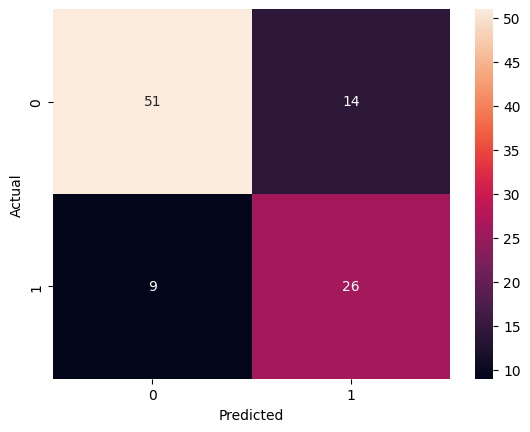

In [ ]:
#Use confusion matrix to validate our model

#confusion_matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
class_counts = data['pus cell'].value_counts()
print(class_counts)

1    324
0     76
Name: pus cell, dtype: int64


In [ ]:
# Apply the function
data['diabetes mellitus'] = data['diabetes mellitus'].replace(np.nan, 0)

In [ ]:
#Apply logistic regression
#Logistic Regression Code

#features extraction
x = data[['age', 'blood_pressure','specific gravity', 'albumin',	'sugar', 'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria'	]]
y = data['diabetes mellitus']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
Accuracy_LogReg = logreg.score(x_train, y_train)
print("Accuracy = {:.2f}".format(Accuracy_LogReg))
#les y_test sont les valeurs de x_test

Accuracy = 0.77


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: xlabel='Predicted', ylabel='Actual'>

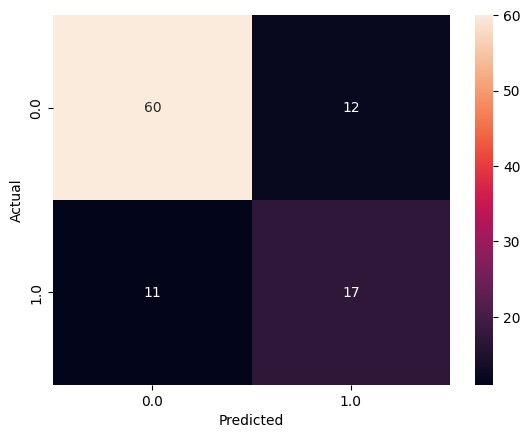

In [ ]:
#Use confusion matrix to validate your model

#confusion_matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
# Apply the function
data['coronary artery disease'] = data['coronary artery disease'].replace(np.nan, 0)

In [ ]:
#Apply logistic regression
#Logistic Regression Code

#features extraction
x = data[['age', 'blood_pressure','specific gravity', 'albumin',	'sugar', 'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria'	]]
y = data['coronary artery disease']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
Accuracy_LogReg = logreg.score(x_train, y_train)
print("Accuracy = {:.2f}".format(Accuracy_LogReg))
#les y_test sont les valeurs de x_test

Accuracy = 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: xlabel='Predicted', ylabel='Actual'>

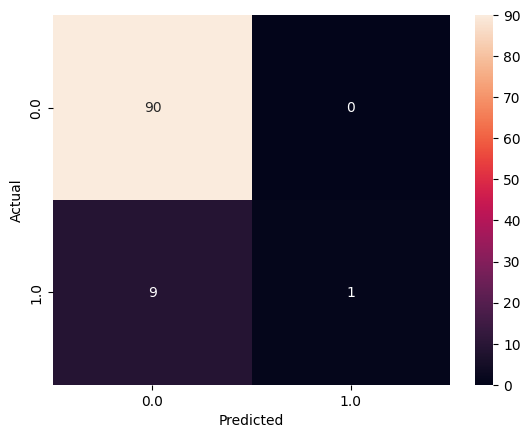

In [ ]:
#Use confusion matrix to validate your model

#confusion_matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
# Apply the function
#data['appetite'] = data['appetite'].replace(np.nan, 0)

In [ ]:
#Apply logistic regression
#Logistic Regression Code

#features extraction
x = data[['age', 'blood_pressure','specific gravity', 'albumin',	'sugar', 'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria'	]]
y = data['appetite']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
Accuracy_LogReg = logreg.score(x_train, y_train)
print("Accuracy = {:.2f}".format(Accuracy_LogReg))
#les y_test sont les valeurs de x_test

Accuracy = 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: xlabel='Predicted', ylabel='Actual'>

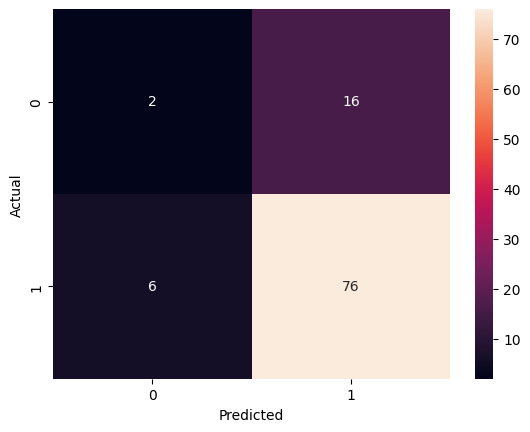

In [ ]:
#Use confusion matrix to validate your model

#confusion_matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#Apply logistic regression
#Logistic Regression Code

#features extraction
x = data[['age', 'blood_pressure','specific gravity', 'albumin',	'sugar', 'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria'	]]
y = data['pedal edema']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
Accuracy_LogReg = logreg.score(x_train, y_train)
print("Accuracy = {:.2f}".format(Accuracy_LogReg))
#les y_test sont les valeurs de x_test

Accuracy = 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: xlabel='Predicted', ylabel='Actual'>

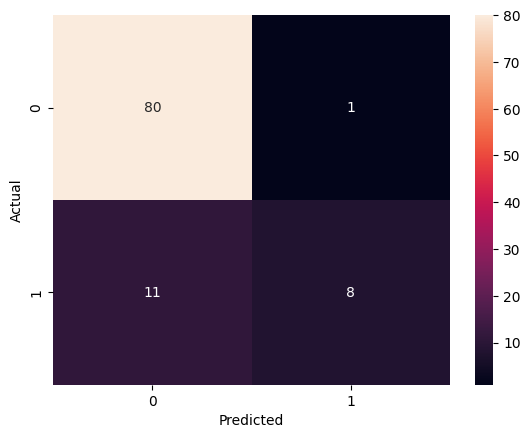

In [ ]:
#Use confusion matrix to validate your model

#confusion_matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#Apply logistic regression
#Logistic Regression Code

#features extraction
x = data[['age', 'blood_pressure','specific gravity', 'albumin',	'sugar', 'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria'	]]
y = data['anemia']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
Accuracy_LogReg = logreg.score(x_train, y_train)
print("Accuracy = {:.2f}".format(Accuracy_LogReg))
#les y_test sont les valeurs de x_test

Accuracy = 0.86


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: xlabel='Predicted', ylabel='Actual'>

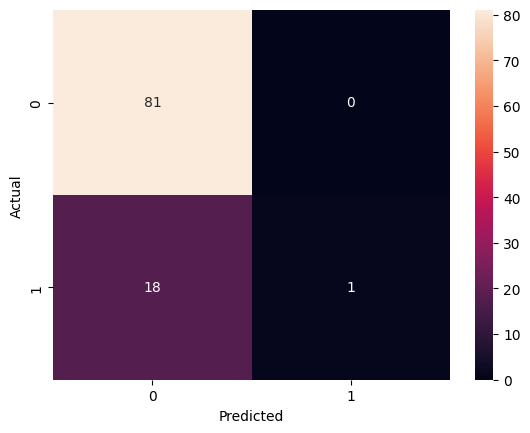

In [ ]:
#Use confusion matrix to validate your model

#confusion_matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#Apply KNN
#Apply the KNN and predict your model

x = data[['age', 'blood_pressure','specific gravity', 'albumin',	'sugar', 'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria']]
y = data['anemia']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
#Knn Code
knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
Accuracy_KNN = accuracy_score(y_pred,y_test)
print('Accuracy = ',Accuracy_KNN)


Accuracy =  0.81


In [ ]:
#Choose the optimal number of neighbors

n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

#choose the optimal number of neighbors
#The Good One : Accuracy for k= 24 is: 0.85

Accuracy for k= 1 is: 0.81
Accuracy for k= 2 is: 0.81
Accuracy for k= 3 is: 0.81
Accuracy for k= 4 is: 0.81
Accuracy for k= 5 is: 0.81
Accuracy for k= 6 is: 0.81
Accuracy for k= 7 is: 0.81
Accuracy for k= 8 is: 0.81
Accuracy for k= 9 is: 0.82
Accuracy for k= 10 is: 0.81
Accuracy for k= 11 is: 0.81
Accuracy for k= 12 is: 0.82
Accuracy for k= 13 is: 0.82
Accuracy for k= 14 is: 0.82
Accuracy for k= 15 is: 0.82
Accuracy for k= 16 is: 0.82
Accuracy for k= 17 is: 0.84
Accuracy for k= 18 is: 0.83
Accuracy for k= 19 is: 0.84
Accuracy for k= 20 is: 0.83
Accuracy for k= 21 is: 0.81
Accuracy for k= 22 is: 0.83
Accuracy for k= 23 is: 0.84
Accuracy for k= 24 is: 0.85
Accuracy for k= 25 is: 0.84
Accuracy for k= 26 is: 0.84
Accuracy for k= 27 is: 0.85
Accuracy for k= 28 is: 0.82
Accuracy for k= 29 is: 0.76


In [ ]:
#Apply decision tree

#Apply decision tree and predict you model
x = data[['age', 'blood_pressure','specific gravity', 'albumin',	'sugar', 'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria']]
y = data['anemia']

# Apply one-hot encoding to categorical columns
x_encoded = pd.get_dummies(x)

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.20, random_state=10)

# Applying the tree algorithm
our_tree = tree.DecisionTreeClassifier(criterion='gini', splitter='random', max_leaf_nodes=10, min_samples_leaf=5, max_depth=5 )
our_tree.fit(x_train, y_train)   # Fitting our model
y_pred = our_tree.predict(x_test)   # Evaluating our model
Accuracy_DecTree = accuracy_score(y_test, y_pred)
print("score: ", Accuracy_DecTree)

score:  0.8625


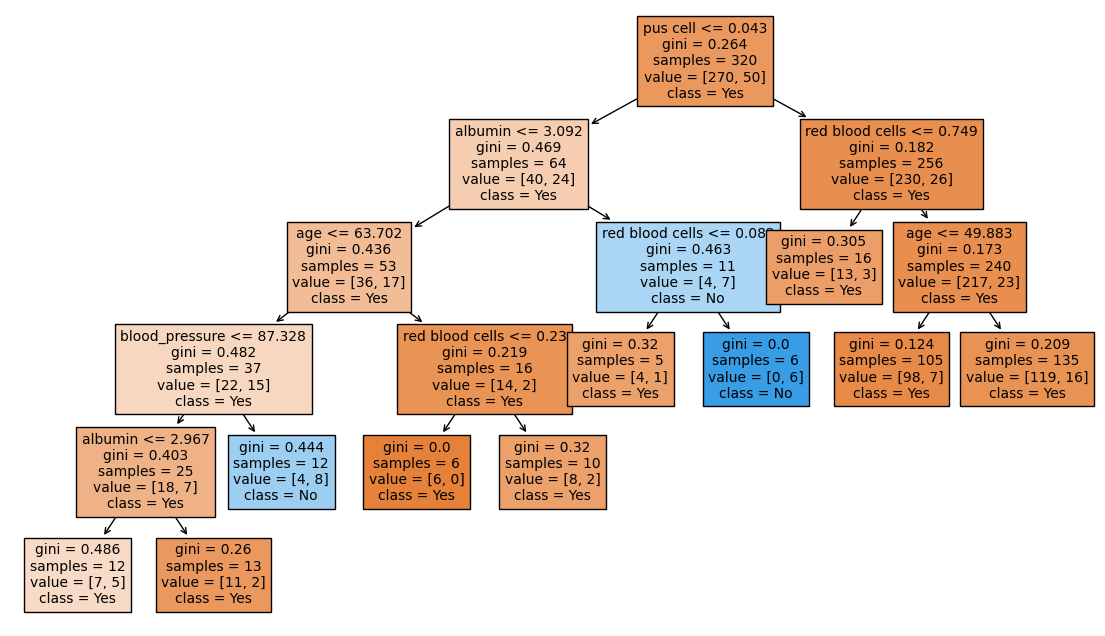

In [ ]:
# visualise the decision tree

fig = plt.figure(figsize=(14,8))
_ = tree.plot_tree(our_tree,
              feature_names=list(x),
              class_names = ['Yes', "No"],
              filled=True,
              fontsize=10)


In [ ]:
#calculate the accuracy

#Calculate the new accuracy and compare it with the previous result.

our_tree=tree.DecisionTreeClassifier()

#Reshape our data
_x = np.array(y_test)
x = _x.reshape(-1, 1)
_y = np.array(y_pred)
y = _y.reshape(-1, 1)
scores = cross_val_score(our_tree, x, y, cv=5)
print("Accuracy on each fold/subset : ", scores)
print("The average accuracy is : ", sum(scores)/5)

#We can notice that :
#First accuracy (0.825) < To second accuracy(0.9)


Accuracy on each fold/subset :  [1.     1.     0.9375 0.9375 0.9375]
The average accuracy is :  0.9625


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
#Apply random forest
#Use random forest then change the number of estimators

#Random Forest prediction

RFC=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 10 decision trees
RFC.fit(x_train, y_train)  #Training our model
y_pred=RFC.predict(x_test)  #testing our model
Accuracy_RandForest = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy_RandForest)  #Measuring the accuracy of our model

Accuracy: 0.8125


In [ ]:
#calculate the accuracy

#Calculate the new accuracy and compare it with the previous result.

our_tree=tree.DecisionTreeClassifier()

#Reshape our data
_x = np.array(y_test)
x = _x.reshape(-1, 1)
_y = np.array(y_pred)
y = _y.reshape(-1, 1)
scores = cross_val_score(our_tree, x, y, cv=5)
print("Accuracy on each fold/subset : ", scores)
print("The average accuracy is : ", sum(scores)/5)

#We can notice that :
#First accuracy (0.825) < To second accuracy(0.925)

Accuracy on each fold/subset :  [0.9375 0.875  0.875  0.875  0.875 ]
The average accuracy is :  0.8875


**UNSUPERVISED LEARNING ALGORITHMS**  


In [ ]:
#Clustering Preprocessing
data=data.drop("id", axis=1)

In [ ]:
#Use hierarchical clustering to identify the inherent groupings within our data
model=AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete')

#Applying agglomerative algorithm with 10 clusters, using euclidean distance as a metric
clust_labels=model.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,7
1,3
2,7
3,7
4,7
...,...
395,7
396,7
397,7
398,7


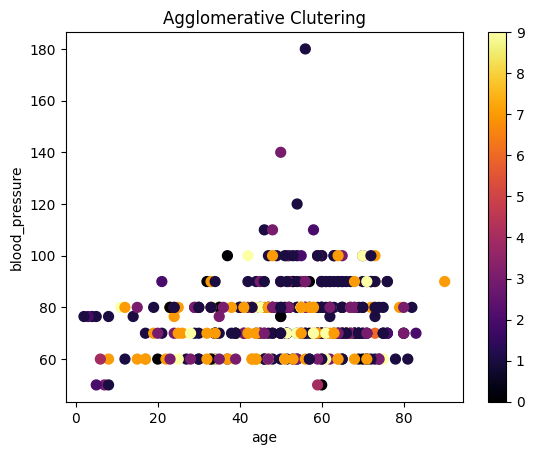

In [ ]:
#Plot the clusters

#Agglomerative cluster plot
#Plot containing the clusters.
#Each colored group represents a cluster.

import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['age'] , data ["blood_pressure"] , c= agglomerative[0], s=50, cmap='inferno')
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("age")
ax.set_ylabel("blood_pressure")
plt.colorbar(scatter)

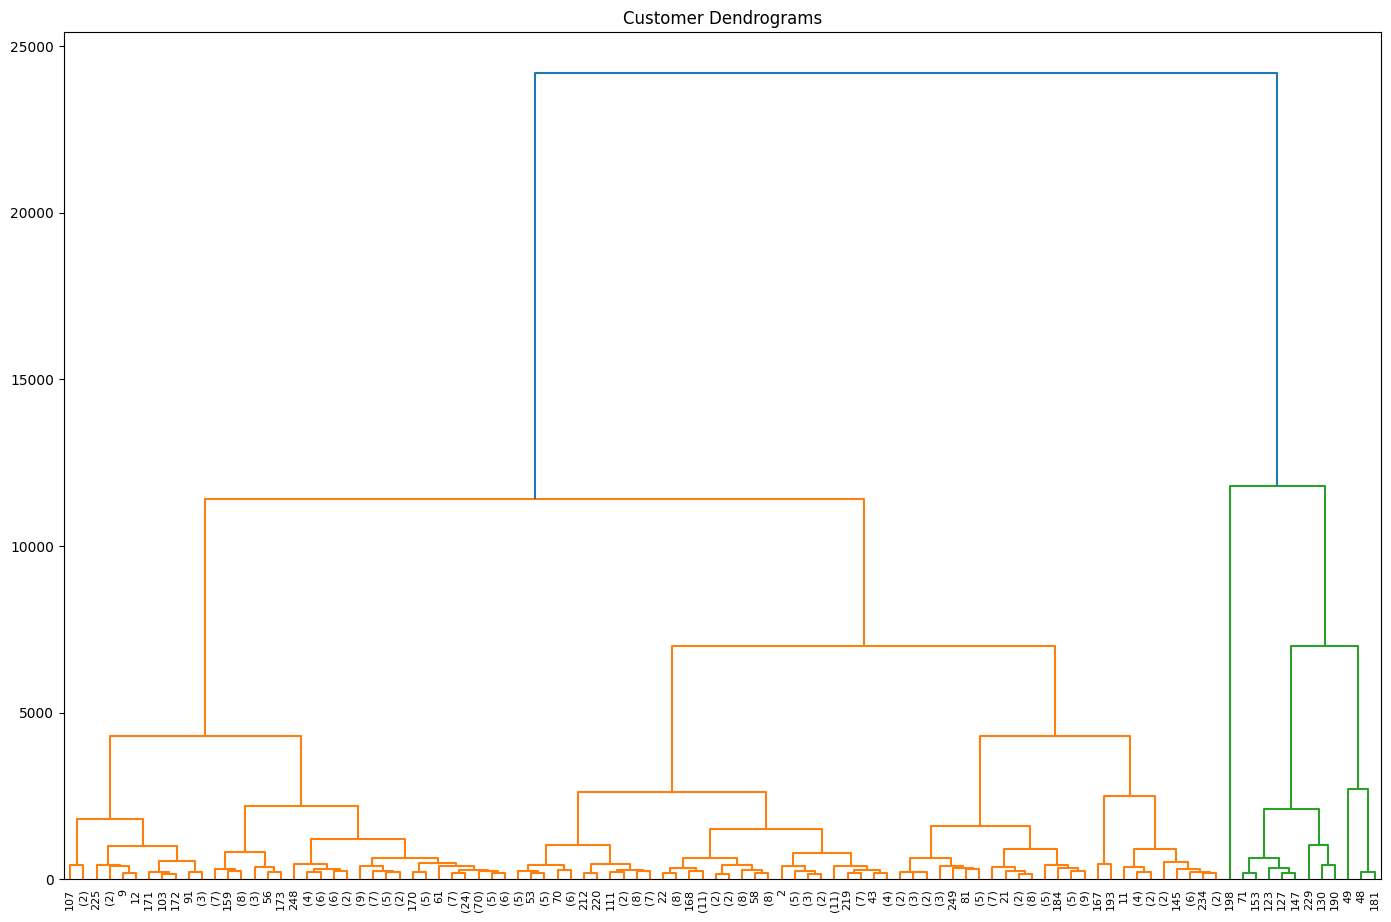

In [ ]:
#Plot the dendrogram

#Dendrogram visualization
plt.figure(figsize=(17,11))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"),truncate_mode='lastp',p=100, leaf_rotation=90., leaf_font_size=8.,)

In [ ]:
#Use k-means clustering

#Kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(data)
#Kmeans.labels_array()
model = KMeans(5)
model.fit(data)
y_kmeans = model.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


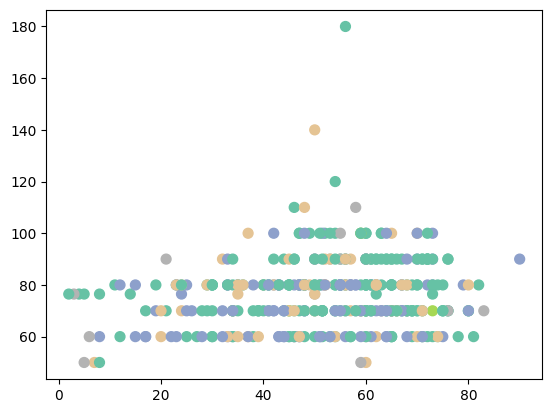

In [ ]:
plt.scatter(data['age'], data['blood_pressure'], c=y_kmeans, s=50, cmap='Set2')

In [ ]:
model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2],model.cluster_centers_[:,3]
#L'alogorithme choisi au fur et à mesure les meilleurs centres

(array([53.18542817, 49.43487733, 59.25      , 49.0862069 , 50.47826087]),
 array([77.56175606, 74.41175067, 77.5       , 76.6023818 , 75.77991932]),
 array([1.01700483, 1.01976852, 1.015     , 1.01862069, 1.0126087 ]),
 array([0.89855072, 0.64814815, 2.        , 0.77586207, 2.2173913 ]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


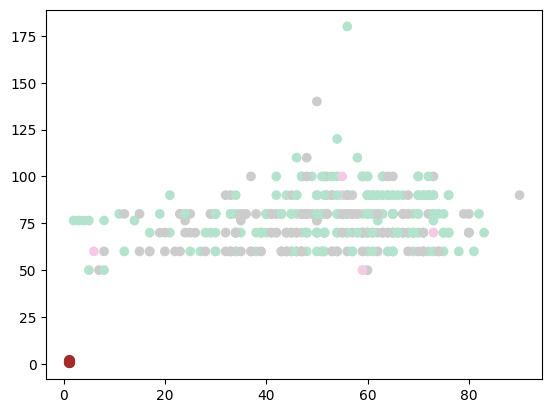

In [ ]:
model = KMeans(n_clusters=3)
model.fit(data)
model.predict(data)
plt.scatter(data['age'], data['blood_pressure'], c=model.predict(data), cmap='Pastel2_r')
plt.scatter(model.cluster_centers_[:,2], model.cluster_centers_[:,3],c='brown', s=50)

In [ ]:
#Fonction coût de notre modèle : inertia
model.inertia_
#Somme des distances entre les point d'un cluster et le centroid

562464201.5998386

In [ ]:
#Try different k values and select the best one

#Calculating the squared distance of each point from its closest cluster .

squared_distances = []
K = range(1,20)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(data)
  squared_distances.append(km.inertia_)
print(squared_distances)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[2695162560.793913, 1201332241.2818909, 562464201.5998386, 388101008.7557868, 232823324.5960277, 175448420.3860476, 133968957.32420596, 103493188.70045318, 79752533.04945101, 56083580.725160435, 47548276.90668726, 40382870.22827718, 35658719.61250621, 30724366.14766524, 26907847.90322572, 22840314.676332448, 19514097.266908683, 16891759.50842988, 14635051.129686983]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Coût du modèle inertia ')

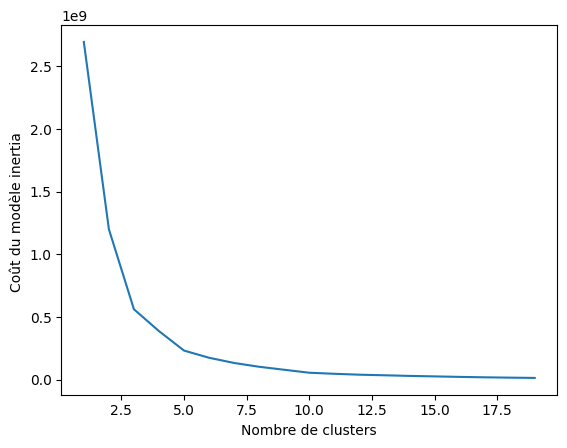

In [ ]:
plt.plot(K, squared_distances)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du modèle inertia ')